In [1]:
import pandas as pd
import csv
import numpy as np
import random
from icecream import ic
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
dataframe=[]
df11=pd.read_excel('../my_csv/fixtures/fixtures 11-12.xlsx')
dataframe.append(df11)
df12=pd.read_excel('../my_csv/fixtures/fixtures 12-13.xlsx')
dataframe.append(df12)
df13=pd.read_excel('../my_csv/fixtures/fixtures 13-14.xlsx')
dataframe.append(df13)
df14=pd.read_excel('../my_csv/fixtures/fixtures 14-15.xlsx')
dataframe.append(df14)
df15=pd.read_excel('../my_csv/fixtures/fixtures 15-16.xlsx')
dataframe.append(df15)
df16=pd.read_excel('../my_csv/fixtures/fixtures 16-17.xlsx')
dataframe.append(df16)
df17=pd.read_excel('../my_csv/fixtures/fixtures 17-18.xlsx')
dataframe.append(df17)
df18=pd.read_excel('../my_csv/fixtures/fixtures 18-19.xlsx')
dataframe.append(df18)
df19=pd.read_excel('../my_csv/fixtures/fixtures 19-20.xlsx')
dataframe.append(df19)
df20=pd.read_excel('../my_csv/fixtures/fixtures 20-21.xlsx')
dataframe.append(df20)
df21=pd.read_excel('../my_csv/fixtures/fixtures 21-22.xlsx')
dataframe.append(df21)
for count in dataframe:
    count.dropna(inplace=True)

In [3]:
common_dict={}
for count in dataframe:
    for skip in count['Home']:
        if skip not in common_dict:
            common_dict[skip]=1
        else:
            common_dict[skip]+=1
common_list=[]
common_dict=sorted(common_dict.items(),key=lambda x:x[1],reverse=True)
for count in range(20):
    common_list.append(common_dict[count][0])
common_list

['Liverpool',
 'Manchester City',
 'Arsenal',
 'Chelsea',
 'Everton',
 'Manchester Utd',
 'Tottenham',
 'Newcastle Utd',
 'West Ham',
 'Southampton',
 'Crystal Palace',
 'West Brom',
 'Aston Villa',
 'Leicester City',
 'Stoke City',
 'Swansea City',
 'Burnley',
 'Sunderland',
 'Norwich City',
 'Watford']

In [4]:
new=pd.DataFrame(columns=['Team','HW','HD','HL','AW','AD','AL'])
new['Team']=common_list
new.fillna(0,inplace=True)

In [5]:
# selected=['Manchester Utd','Chelsea','Arsenal','Tottenham','Manchester City','Liverpool']
streak=[]
goals=[]
for team in common_list:
    team_streak=[]
    team_goals=[]
    for temp in dataframe:
        for count in temp.index:
            if temp['Home'][count]==team and temp['Score'][count][0]>temp['Score'][count][2]:
                team_streak.append(1)
                team_goals.append(temp['Score'][count][2])
            elif temp['Home'][count]==team and temp['Score'][count][0]==temp['Score'][count][2]:
                team_streak.append(0)
                team_goals.append(temp['Score'][count][2])
            elif temp['Home'][count]==team and temp['Score'][count][0]<temp['Score'][count][2]:
                team_streak.append(-1)
                team_goals.append(temp['Score'][count][2])
            if temp['Away'][count]==team and temp['Score'][count][2]>temp['Score'][count][0]:
                team_streak.append(1)
                team_goals.append(temp['Score'][count][0])
            elif temp['Away'][count]==team and temp['Score'][count][2]==temp['Score'][count][0]:
                team_streak.append(0)
                team_goals.append(temp['Score'][count][0])
            elif temp['Away'][count]==team and temp['Score'][count][2]<temp['Score'][count][0]:
                team_streak.append(-1)
                team_goals.append(temp['Score'][count][0])
    streak.append(team_streak)
    goals.append(team_goals)

In [6]:
streak_list={}
for skip in streak:
    current=0
    total_wins=0
    total_draws=0
    total_losses=0
    print(common_list[streak.index(skip)])
    team_streak={0:{'count':0,'w':0,'d':0,'l':0}}
    for count in skip:
        if count==1:
            current+=1
            if current not in team_streak and current==1:
                team_streak[current]={'count':0,'w':0,'d':0,'l':0}
                team_streak[current]['count']+=1
            elif current not in team_streak and current!=1:
                team_streak[current]={'count':0,'w':0,'d':0,'l':0}
                team_streak[current]['count']+=1
                team_streak[current-1]['w']+=1
            elif current in team_streak and current==1:
                team_streak[current]['count']+=1
            elif current in team_streak and current!=1:
                team_streak[current]['count']+=1
                team_streak[current-1]['w']+=1
        elif count==0:
            if current>0:
                team_streak[current]['d']+=1
                team_streak[0]['count']+=1
            elif current == 0:
                team_streak[current]['count']+=1
                team_streak[current]['d']+=1
            current=0
        elif count==-1:
            if current>0:
                team_streak[current]['l']+=1
                team_streak[0]['count']+=1
            elif current == 0:
                team_streak[current]['count']+=1
                team_streak[current]['l']+=1
            current=0
    team_streak[0]['w']=team_streak[0]['count']-team_streak[0]['d']-team_streak[0]['l']
    streak_list[common_list[streak.index(skip)]]=team_streak

Liverpool
Manchester City
Arsenal
Chelsea
Everton
Manchester Utd
Tottenham
Newcastle Utd
West Ham
Southampton
Crystal Palace
West Brom
Aston Villa
Leicester City
Stoke City
Swansea City
Burnley
Sunderland
Norwich City
Watford


In [7]:
pd.DataFrame(streak_list['Arsenal'])

,0,1,2,3,4,5,6,7,8
count,193,102,52,33,16,12,6,3,1
w,101,52,33,16,12,6,3,1,0
d,46,20,6,5,2,4,2,1,1
l,46,29,13,12,2,2,1,1,0


In [8]:
streak_list

{'Liverpool': {0: {'count': 175, 'w': 93, 'd': 39, 'l': 43},
  1: {'count': 94, 'w': 53, 'd': 26, 'l': 15},
  2: {'count': 53, 'w': 25, 'd': 19, 'l': 9},
  3: {'count': 25, 'w': 15, 'd': 6, 'l': 3},
  4: {'count': 15, 'w': 11, 'd': 2, 'l': 2},
  5: {'count': 11, 'w': 8, 'd': 1, 'l': 2},
  6: {'count': 8, 'w': 7, 'd': 1, 'l': 0},
  7: {'count': 7, 'w': 5, 'd': 2, 'l': 0},
  8: {'count': 5, 'w': 5, 'd': 0, 'l': 0},
  9: {'count': 5, 'w': 4, 'd': 0, 'l': 1},
  10: {'count': 4, 'w': 3, 'd': 1, 'l': 0},
  11: {'count': 3, 'w': 2, 'd': 0, 'l': 1},
  12: {'count': 2, 'w': 2, 'd': 0, 'l': 0},
  13: {'count': 2, 'w': 2, 'd': 0, 'l': 0},
  14: {'count': 2, 'w': 2, 'd': 0, 'l': 0},
  15: {'count': 2, 'w': 2, 'd': 0, 'l': 0},
  16: {'count': 2, 'w': 2, 'd': 0, 'l': 0},
  17: {'count': 2, 'w': 1, 'd': 1, 'l': 0},
  18: {'count': 1, 'w': 0, 'd': 0, 'l': 1}},
 'Manchester City': {0: {'count': 128, 'w': 94, 'd': 19, 'l': 15},
  1: {'count': 95, 'w': 57, 'd': 18, 'l': 19},
  2: {'count': 57, 'w': 36, '

In [9]:
streak_frames={}
for count in common_list:
    streak_frames[count]=pd.DataFrame(streak_list[count]).T

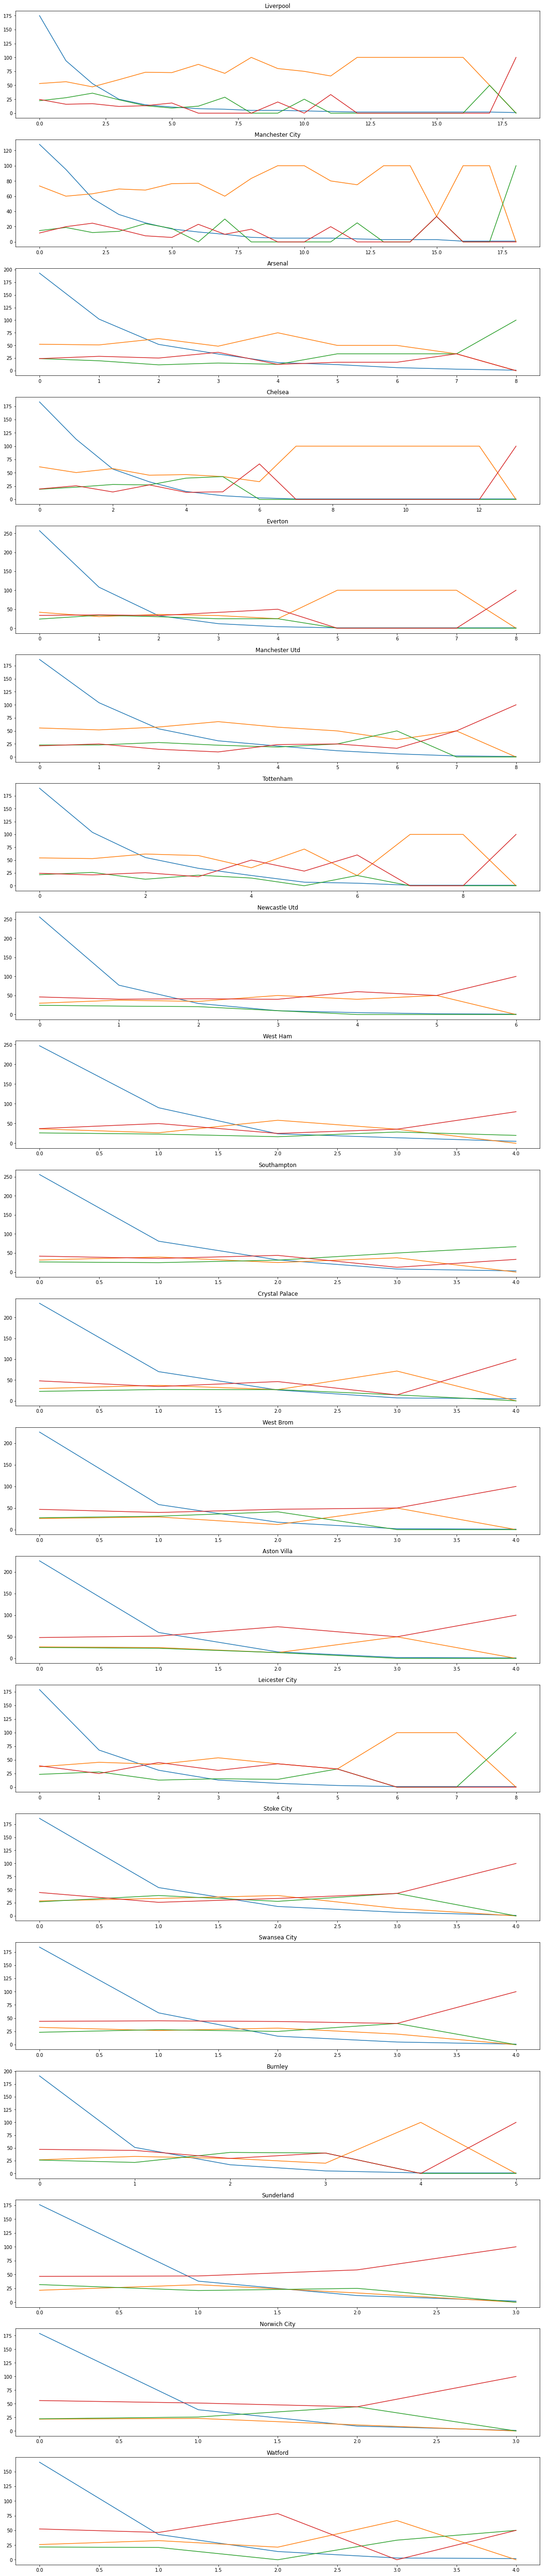

In [11]:
fig,axs=plt.subplots(len(common_list))
fig.set_size_inches(20,100)
for count in common_list:
    axs[common_list.index(count)].set_title(count)
    axs[common_list.index(count)].plot(streak_frames[count].index,streak_frames[count]['count'],label='streak')
    axs[common_list.index(count)].plot(streak_frames[count].index,((streak_frames[count]['w'])/(streak_frames[count]['count']))*100,label='win probability')
    axs[common_list.index(count)].plot(streak_frames[count].index,((streak_frames[count]['d'])/(streak_frames[count]['count']))*100,label='draw probability')
    axs[common_list.index(count)].plot(streak_frames[count].index,((streak_frames[count]['l'])/(streak_frames[count]['count']))*100,label='loss probability')